# Importing Libraries 

In [61]:
# Importing Libraries 
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

sns.set()

[nltk_data] Downloading package stopwords to C:\Users\ANITA
[nltk_data]     BOADU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ANITA
[nltk_data]     BOADU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ANITA BOADU\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
with open('20th_century_events.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', ' ')

# Sentence Tokenization

In [3]:
from nltk.tokenize import sent_tokenize

tokenized_sent = sent_tokenize(data)

print(tokenized_sent[:10])

['  Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914â€“1918)           1.2 Spanish flu       1.2.1 Russian Revolution and communism           1.3 Between the wars       1.3.1 Economic depression         1.3.2 The rise of dictatorship           1.4 Global war: World

# Word Tokenization

In [4]:
from nltk.tokenize import word_tokenize

tokenized_word = word_tokenize(data)

print(tokenized_word[:50])

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Contents']


# Frequency Distribution

In [5]:
from nltk.probability import FreqDist

dist_words = FreqDist(tokenized_word)

dist_words.most_common(10)

[('.', 1627),
 ('the', 1146),
 (',', 980),
 ('of', 628),
 ('and', 414),
 ('to', 333),
 ('The', 331),
 ('in', 312),
 ('[', 309),
 (']', 309)]

# Plot Word Frequency

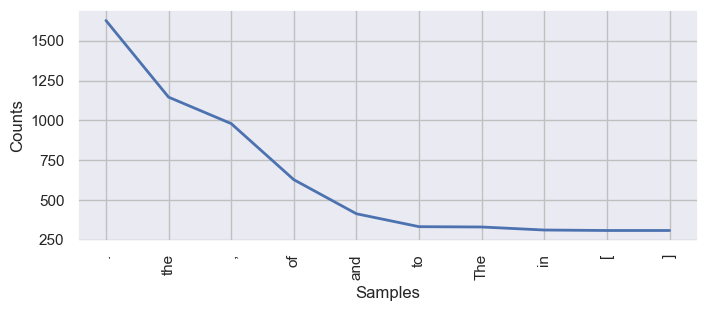

In [6]:
plt.figure(figsize=(8,3))
dist_words.plot(10)
plt.show()

# Remove Stop Words

In [10]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{"shouldn't", "hasn't", "they'll", "mustn't", "couldn't", 'in', 'my', 'few', 'can', 'from', 'why', 'each', 'you', 'couldn', 'its', 'they', 'don', 'was', 'to', 'against', 'has', 'own', 'aren', "haven't", 'himself', 'whom', 'which', 'at', 'during', 'hasn', 'between', 'than', "they've", 'didn', 'should', "wasn't", 'haven', 'more', 'weren', 'no', "we'll", 'mustn', "doesn't", 'shan', 'did', "you've", 'again', 'before', 'off', 'being', 'shouldn', 'yours', 'her', 'when', 'above', 've', 'hadn', 'where', 'will', 'is', "it'll", 'now', 'are', 'this', 'after', 'once', "they're", 'isn', "she's", 'ain', 'and', "that'll", 'down', 'were', 'while', 'out', 'd', 'have', 'y', "we're", "it's", "mightn't", "should've", 'am', "we'd", "i'll", 'some', 'what', "hadn't", 's', 'same', 'for', 'but', 'he', "he'd", 'on', 'had', 'themselves', 'about', 'too', 'theirs', 'she', "you'd", "weren't", "didn't", 'a', 'or', 'ma', 'with', 'nor', 'be', 'needn', 'the', "needn't", 'wouldn', 'myself', 'having', 'further', 'i', 'ov

In [14]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [15]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSpecial',
 'pages',
 'Search',
 'Search',
 'Appearance',
 'Donate',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Donate',
 'Create',
 'account',
 'Log',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1',
 'Historic',
 'events',
 '20th',
 'century',
 'Toggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection',
 '1.1',
 'World',
 'beginning',
 'century',
 '1.1.1',
 '``',
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.2',
 'Spanish',
 'flu',
 '1.2.1',
 'Russian',
 'Revolution',
 'communism',
 '1.3',
 'Between',
 'wars',
 '1.3.1',
 'Economic',
 'depr

In [20]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4827 samples and 17791 outcomes>


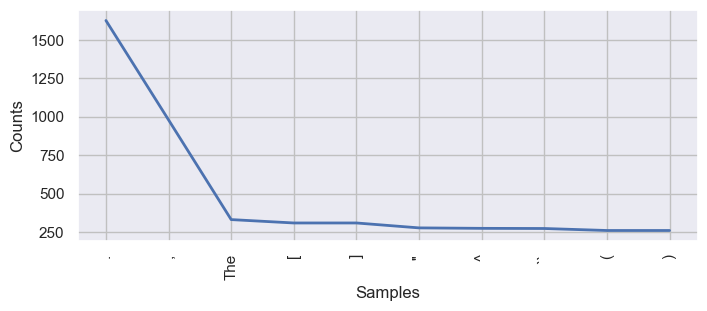

In [21]:
# Frequency Distribution Plot
plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [25]:
dist_words_filter

FreqDist({'.': 1627, ',': 980, 'The': 331, '[': 309, ']': 309, "''": 277, '^': 274, '``': 273, '(': 260, ')': 260, ...})

# Remove Punctuation with Regex

In [26]:
# Substitute all punctuations marks with a space 
sans_punc = re.sub("[^a-zA-Z]", " ", str(filtered_words))

In [27]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSpecial    pages    Search    Search    Appearance    Donate    Create    account    Log    Personal    tools    Donate    Create    account    Log    Contents    move    sidebar    hide         Top              Historic    events      th    century    Toggle    Historic    events      th    century    subsection           World    beginning    century                   The    war    end    wars               World    War    I                                            Spanish    flu             Russian    Revolution    communism           Between    wars             Economic    depression             The    rise    dictatorship           Global    war         World    War

In [28]:
# Tokenize Again
tokenized_word_2 = word_tokenize(sans_punc)

In [29]:
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'wa

In [33]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

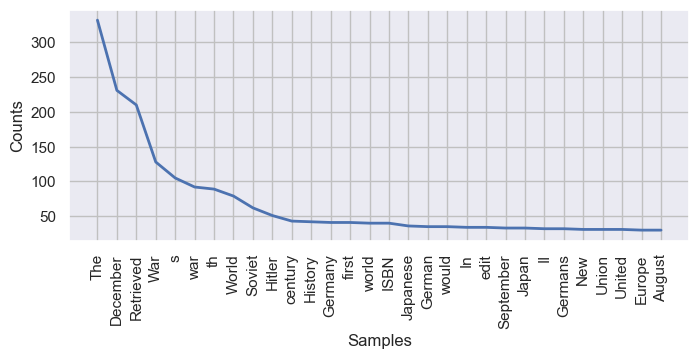

In [34]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [35]:
dist_words_filter_2.most_common(20)

[('The', 332),
 ('December', 231),
 ('Retrieved', 210),
 ('War', 128),
 ('s', 105),
 ('war', 92),
 ('th', 89),
 ('World', 79),
 ('Soviet', 62),
 ('Hitler', 51),
 ('century', 43),
 ('History', 42),
 ('Germany', 41),
 ('first', 41),
 ('world', 40),
 ('ISBN', 40),
 ('Japanese', 36),
 ('German', 35),
 ('would', 35),
 ('In', 34)]

# POS Tagging

In [30]:
text = TextBlob(str(tokenized_word_2))

tags_list = text.tags

# Convert to DataFrame

In [31]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words','Word type']

df_group = df_text.groupby('Word type').count().reset_index()

top20 = df_group.nlargest(20,'Words')

# Create a Tags List Using TextBlob

In [36]:
from textblob import TextBlob

blob = TextBlob(" ".join(tokenized_word_2))

tags_list = blob.tags

print(tags_list[:20])

[('Key', 'JJ'), ('events', 'NNS'), ('th', 'JJ'), ('century', 'NN'), ('Wikipedia', 'NNP'), ('Jump', 'NNP'), ('content', 'NN'), ('Main', 'NNP'), ('menu', 'NN'), ('Main', 'NNP'), ('menu', 'NN'), ('move', 'NN'), ('sidebar', 'NN'), ('hide', 'NN'), ('Navigation', 'NNP'), ('Main', 'NNP'), ('pageContentsCurrent', 'NN'), ('eventsRandom', 'NN'), ('articleAbout', 'IN'), ('WikipediaContact', 'NNP')]


# Create Top 10 POS Tags List

In [37]:
from collections import Counter
import pandas as pd

pos_tags = [tag for word, tag in tags_list]

pos_counts = Counter(pos_tags)

top10_pos = pos_counts.most_common(10)

df_pos = pd.DataFrame(top10_pos, columns=["POS","Count"])

print(df_pos)

   POS  Count
0  NNP   4931
1   NN   1856
2   JJ   1188
3  NNS    695
4  VBD    645
5   DT    381
6   RB    339
7  VBG    238
8   IN    232
9  VBP    157


# Plot POS Tags Using Seaborn

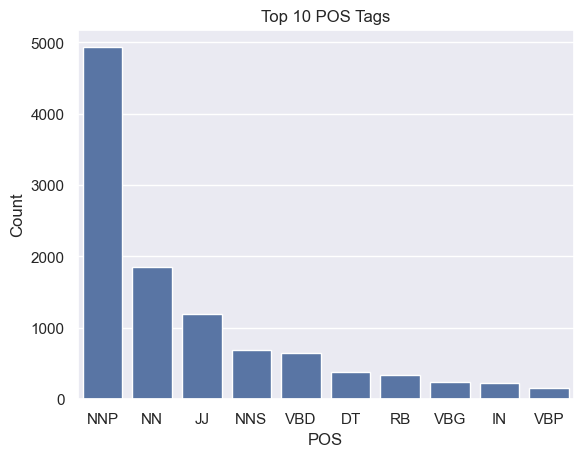

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_pos, x="POS", y="Count")

plt.title("Top 10 POS Tags")
plt.show()

# Bar Plot POS Types

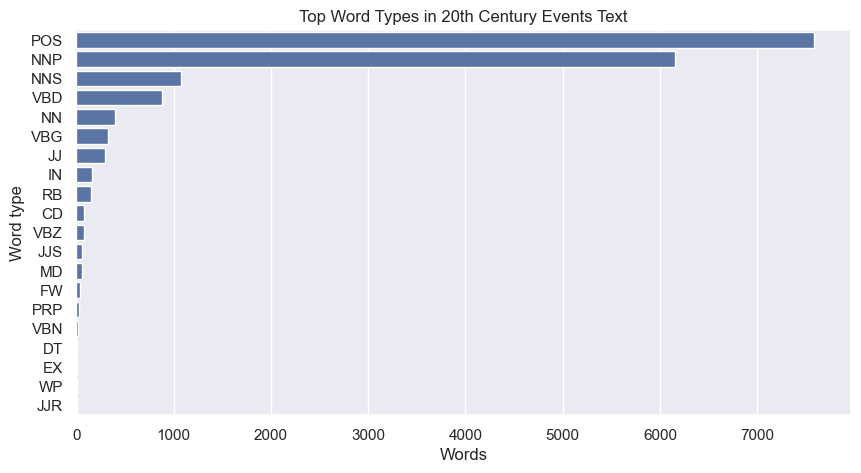

In [32]:
plt.figure(figsize=(10,5))

sns.barplot(
    x="Words",
    y="Word type",
    data=top20
)

plt.title("Top Word Types in 20th Century Events Text")
plt.show()

# Convert tags to dataframe

In [69]:
df_tags = pd.DataFrame(tags_list, columns=["Word","POS"])

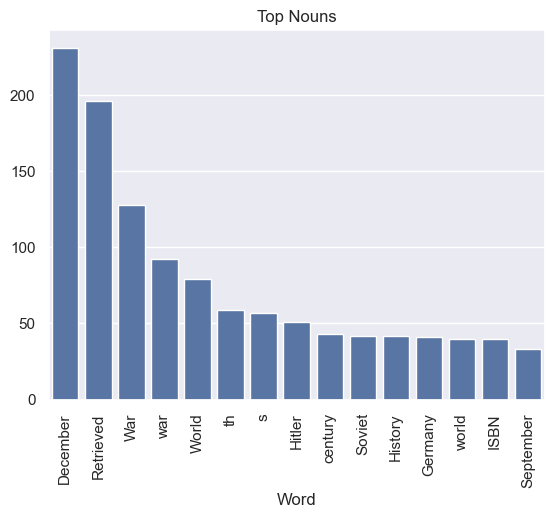

In [70]:
# Nouns Plot
nouns = df_tags[df_tags["POS"].str.contains("NN")]

top_nouns = nouns["Word"].value_counts().head(15)

sns.barplot(x=top_nouns.index, y=top_nouns.values)

plt.xticks(rotation=90)
plt.title("Top Nouns")
plt.show()

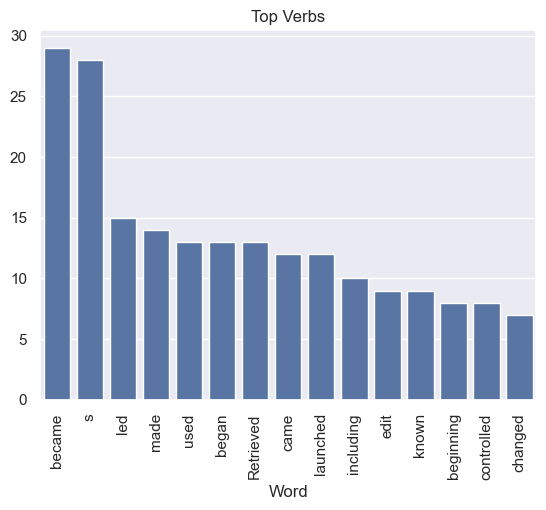

In [72]:
# Verbs Plot
verbs = df_tags[df_tags["POS"].str.contains("VB")]

top_verbs = verbs["Word"].value_counts().head(15)

sns.barplot(x=top_verbs.index, y=top_verbs.values)

plt.xticks(rotation=90)
plt.title("Top Verbs")
plt.show()

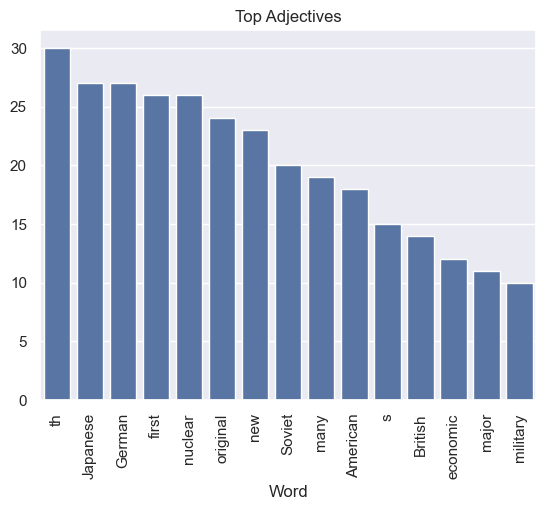

In [71]:
# Adjectives Plot
adjs = df_tags[df_tags["POS"].str.contains("JJ")]

top_adjs = adjs["Word"].value_counts().head(15)

sns.barplot(x=top_adjs.index, y=top_adjs.values)

plt.xticks(rotation=90)
plt.title("Top Adjectives")
plt.show()

The noun plot is dominated by geopolitical entities such as countries, wars, and political leaders, reflecting the historical focus of the article. Verb frequencies highlight action-oriented language such as conflict, agreements, and political movements. Adjectives appear less frequently but emphasize political descriptions and historical context. This distribution suggests the article is primarily informational and event-driven.

C:\Users\ANITA BOADU\AppData\Local\Temp\ipykernel_64920\1243744174.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette="magma")


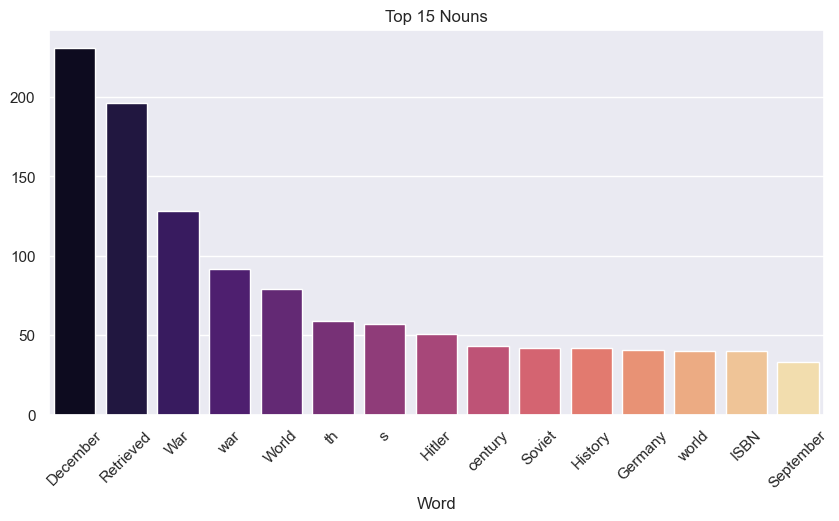

C:\Users\ANITA BOADU\AppData\Local\Temp\ipykernel_64920\1243744174.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette="magma")


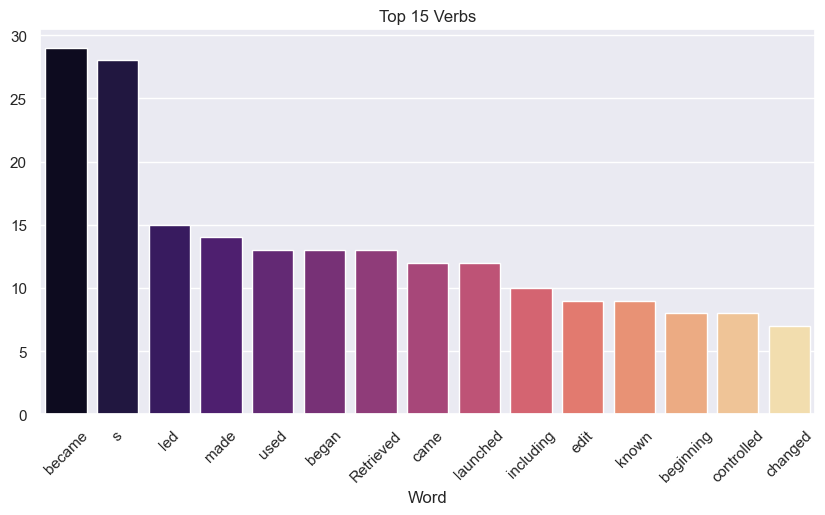

C:\Users\ANITA BOADU\AppData\Local\Temp\ipykernel_64920\1243744174.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette="magma")


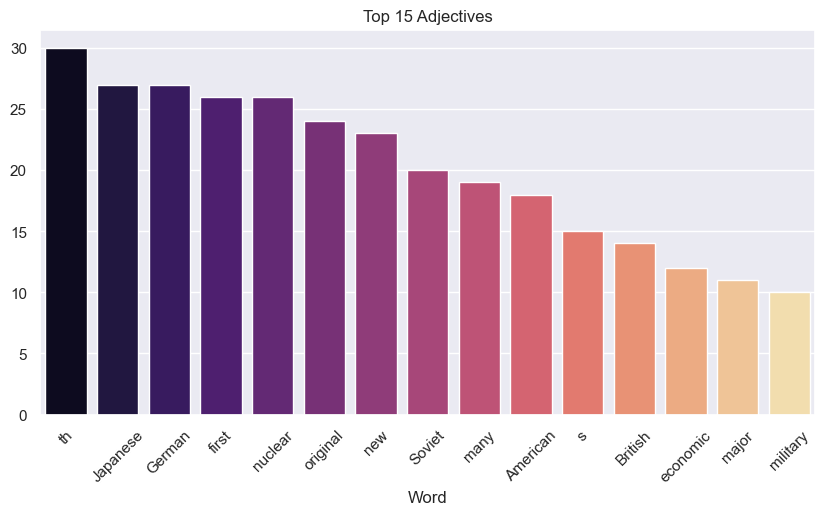

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the POS types we want to find
pos_types = [("NN", "Nouns"), ("VB", "Verbs"), ("JJ", "Adjectives")]

for pos_code, label in pos_types:
    # Filter df_tags for the specific Part of Speech
    filtered_df = df_tags[df_tags["POS"].str.contains(pos_code)]
    top_items = filtered_df["Word"].value_counts().head(15)
    
    # Create the plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_items.index, y=top_items.values, palette="magma")
    plt.xticks(rotation=45)
    plt.title(f"Top 15 {label}")
    plt.show()

Markdown Summary:
The Nouns are likely dominated by "war," "century," and "world," showing the historical focus. Verbs focus on action and establishment ("became," "led"). Adjectives like "global" or "great" highlight the scale of 20th-century events.

In [85]:
# 1. Path is already correct based on your success message
path = r"C:\Users\ANITA BOADU\Twentieth Century Project\20th_century\countries_lookup.txt"

with open(path, "r", encoding="utf-8") as file:
    countries_lookup_list = [line.strip() for line in file if line.strip()]

# 2. Count mentions (Using .string to fix the AttributeError)
country_counts = {}
for country in countries_lookup_list:
    # We use text.string.lower() to access the raw text inside the TextBlob
    country_counts[country] = text.string.lower().count(country.lower())

# 3. Create the DataFrame
import pandas as pd
df_countries = pd.DataFrame(country_counts.items(), columns=["Country", "Mentions"])

# Display the dataframe to check results
df_countries.head(10)

,Country,Mentions
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
5,Antigua and Barbuda,0
6,Argentina,0
7,Armenia,0
8,Australia,7
9,Austria,5


# Create the Frequency Plot

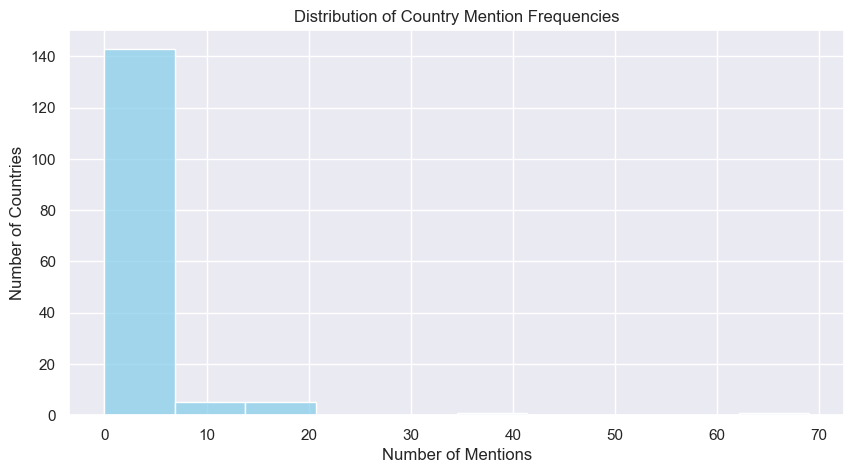

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# This histogram shows how many countries were mentioned 0 times, 1 time, etc.
sns.histplot(df_countries['Mentions'], bins=10, kde=False, color="skyblue")

plt.title("Distribution of Country Mention Frequencies")
plt.xlabel("Number of Mentions")
plt.ylabel("Number of Countries")
plt.show()

**Markdown** The distribution is heavily right-skewed. Most countries have 0 or 1 mentions, while only a few "key players" have high mention counts. This suggests the 20th-century text focuses on a specific group of influential nations rather than providing a balanced global overview.